In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import datasets

In [2]:
df = pd.read_csv(r"C:\Users\jorge\OneDrive\Área de Trabalho\pattern-recognition-RP\data\breast.csv", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [4]:
X, y = df.iloc[:, :30], df.iloc[:, 30]

In [5]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: 30, Length: 569, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from models.RegressãoLogistica.model import LogisticRegression

In [8]:
model = LogisticRegression()

In [9]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [10]:
model.fit(X_train, y_train)

In [11]:
model.w

array([ 1.57781393,  0.52869874,  1.23298269, -0.28644881,  3.27861384,
       -1.44540687, -3.97627836, -4.69269791,  1.54508968,  3.42012478,
       -1.82781549,  1.40092048, -1.44631482, -1.49696761,  1.96689843,
        1.12881901,  0.83109976,  1.46138754,  1.81783683,  1.19445467,
       -0.82468555, -0.36489809, -0.8023164 , -1.73479148,  1.24601986,
       -1.59922774, -2.00474893, -2.7028588 , -0.23092473,  0.20251491])

In [12]:
y_pred = model.predict(X_test)

In [14]:
results = model.calcule_metrics(y_real=y_test, y_pred=y_pred)

## Métricas

In [16]:
TP = results['TP']
TN = results['TN']
FP = results['FP']
FN = results['FN']
AC = results['AC']

In [17]:
accuracy = AC
precision = (TP / (TP + FP)) 
recall = (TP / (TP + FN)) 
f1_score = 2 * ((precision * recall) / (precision + recall))

In [18]:
print('Acurácia:', accuracy * 100)
print('Precisão:', precision * 100)
print('Recall:', recall * 100)
print('F1-score', f1_score * 100)

Acurácia: 88.59649122807018
Precisão: 92.64705882352942
Recall: 88.73239436619718
F1-score 90.6474820143885


### MATRIZ CONFUSÃO

In [19]:
confusion_matrix = np.array([[TN, FP],
                             [FN, TP]])

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=["0", "1"],
                                                    index=["0", "1"])
confusion_matrix_df

,0,1
0,38,5
1,8,63


## Aplicando validação cruzada em 10 folds

In [22]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1_scores = []

In [24]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    results = model.calcule_metrics(y_real=y_test, y_pred=y_pred)
    TP = results['TP']
    TN = results['TN']
    FP = results['FP']
    FN = results['FN']
    AC = results['AC']

    accuracy = AC
    precision = (TP / (TP + FP)) 
    recall = (TP / (TP + FN)) 
    f1_score = 2 * ((precision * recall) / (precision + recall))
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)


In [25]:
metrics = {
    "Accuracy": (np.mean(accuracies), np.std(accuracies)),
    "Precision": (np.mean(precisions), np.std(precisions)),
    "Recall": (np.mean(recalls), np.std(recalls)),
    "F1-Score": (np.mean(f1_scores), np.std(f1_scores)),
}

In [27]:
for metric, (mean, std) in metrics.items():
    print(f"{metric}: Média = {mean:.4f}, Desvio Padrão = {std:.4f}")

Accuracy: Média = 0.9054, Desvio Padrão = 0.0163
Precision: Média = 0.9218, Desvio Padrão = 0.0284
Recall: Média = 0.9269, Desvio Padrão = 0.0211
F1-Score: Média = 0.9240, Desvio Padrão = 0.0157


# Questão 2

In [60]:
iris = datasets.load_iris()

In [61]:
X = iris.data[:, 2:4]
y = iris.target

#### Classe "Setosa" permanece 0, "Versicolor" e "Virginica" viram 1


In [62]:
y_binary = (y != 0).astype(int)
y_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

In [64]:
model2 = LogisticRegression()
model2.fit(X, y)

In [65]:
model2.w

array([35.82475218, 38.0702591 ])

In [75]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x, y = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

grid_points = np.c_[x.ravel(), y.ravel()]
grid_points_normalized = model2.scaler_X.transform(grid_points)  
Z = model2.predict(grid_points_normalized)
Z = Z.reshape(x.shape)

### Mapa de Cores

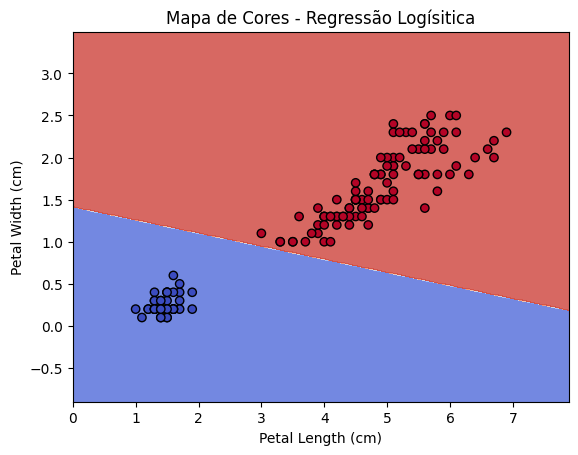

In [77]:
plt.contourf(x, y, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y_binary, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Mapa de Cores - Regressão Logísitica")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()